In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/MachineLearning/Train.csv")

In [4]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [9]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<Axes: >

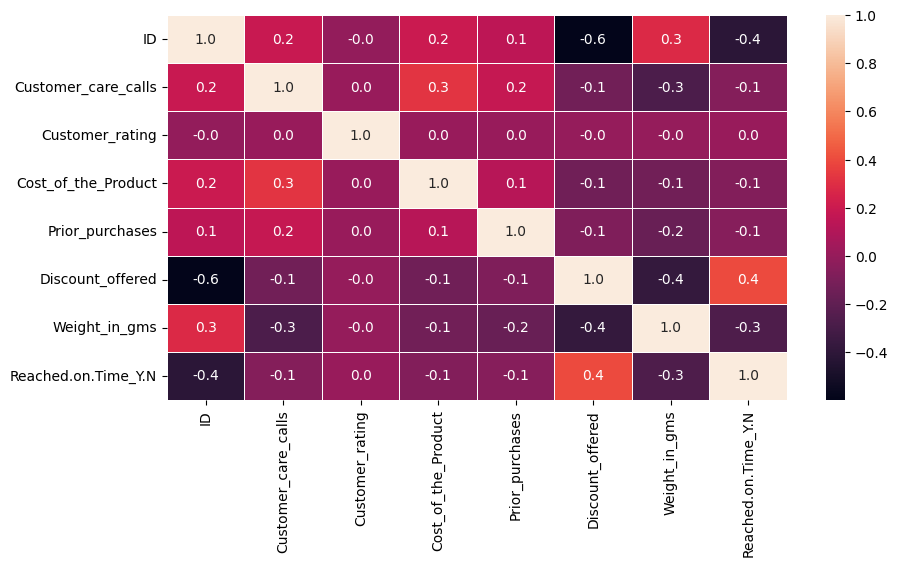

In [10]:
f,ax=plt.subplots(figsize = (10,5))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)

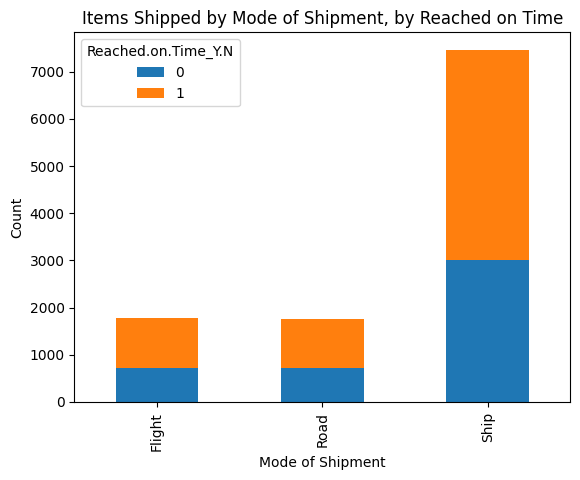

In [11]:
grouped = df.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.title('Items Shipped by Mode of Shipment, by Reached on Time')
plt.show()

#Checking the Gender Classification

*   Liste öğesi
*   Liste öğesi



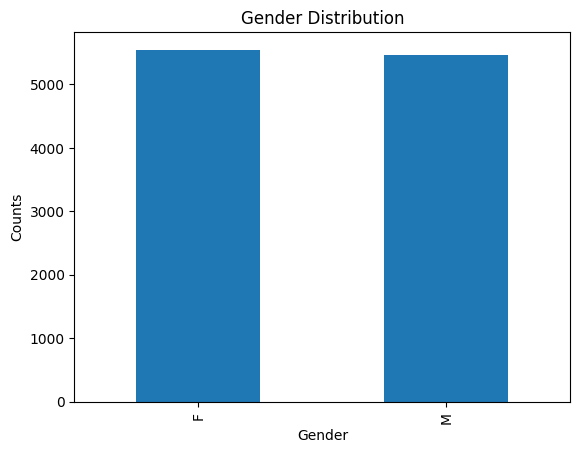

In [12]:
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show()

#Customer Rating

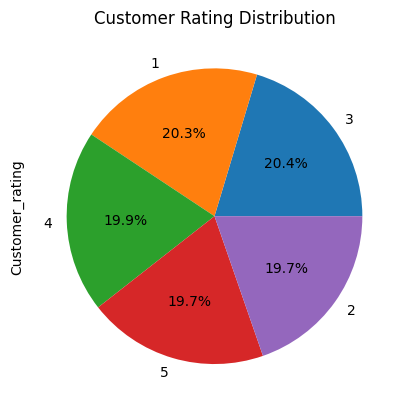

In [13]:
df['Customer_rating'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Customer Rating Distribution')
plt.show()

#Mode od Shipment

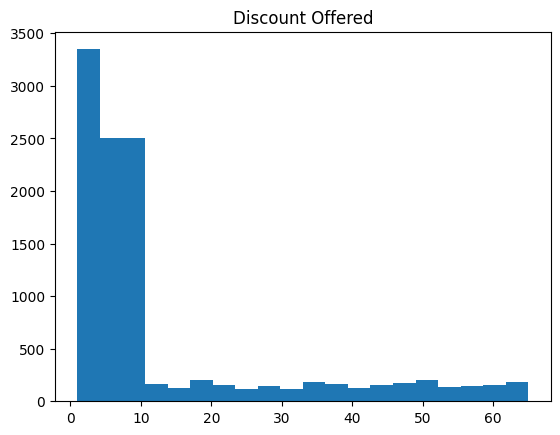

In [14]:
plt.hist(df['Discount_offered'],bins=20)
plt.title('Discount Offered')
plt.show()

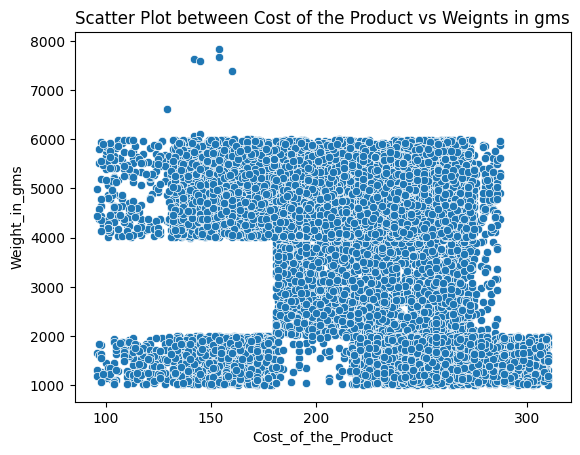

In [15]:
sns.scatterplot(x='Cost_of_the_Product',y='Weight_in_gms',data=df)
plt.title('Scatter Plot between Cost of the Product vs Weignts in gms')
plt.show()

In [16]:
import plotly.express as px
warehouse_counts = df['Warehouse_block'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(values=warehouse_counts, names=warehouse_counts.index, hole=0.5)

# Customize the colors and add labels and title
fig.update_traces(marker=dict(colors=px.colors.sequential.matter_r))
fig.update_traces(textinfo='percent+label')
fig.update_layout(width=650, height=400, title='Warehouse Blocks')

# Show the plot
fig.show()

#Label Encoder

In [17]:
df_category = df.select_dtypes(include=["object"]).copy()

In [18]:
df_columns = df_category.columns
df_columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
for i in df_columns:
  lbe = LabelEncoder()
  df[i] = lbe.fit_transform(df[i])

In [20]:
y = df["Reached.on.Time_Y.N"]
X = df.drop(["Reached.on.Time_Y.N"], axis = 1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Warehouse_block      10999 non-null  int64
 2   Mode_of_Shipment     10999 non-null  int64
 3   Customer_care_calls  10999 non-null  int64
 4   Customer_rating      10999 non-null  int64
 5   Cost_of_the_Product  10999 non-null  int64
 6   Prior_purchases      10999 non-null  int64
 7   Product_importance   10999 non-null  int64
 8   Gender               10999 non-null  int64
 9   Discount_offered     10999 non-null  int64
 10  Weight_in_gms        10999 non-null  int64
 11  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(12)
memory usage: 1.0 MB


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Random Forest

In [22]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, criterion="gini", max_features="auto", n_estimators=100)

In [23]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 729 ms, sys: 16.3 ms, total: 746 ms
Wall time: 509 ms


RandomForestClassifier(max_depth=5, max_features='auto', n_jobs=-1,
                       random_state=42)

In [24]:
y_pred = classifier_rf.predict(X_test)
rf_score = accuracy_score(y_test, y_pred)
print("accuracy_score:", rf_score)

accuracy_score: 0.686060606060606


Text(0.5, 1.0, 'Confusion Matrix of RF')

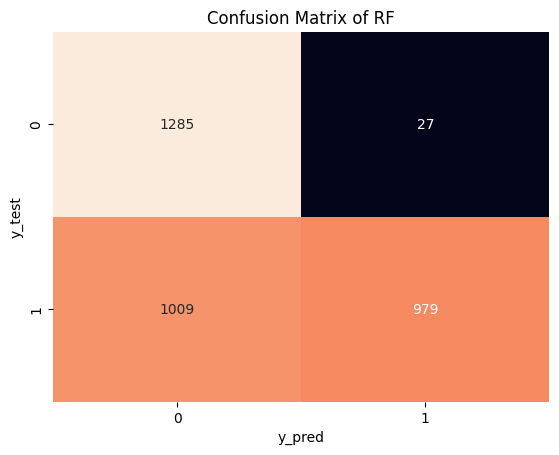

In [25]:
cf_matrix_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix_rf, annot=True, cbar = False, fmt = "g")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix of RF")

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.98      0.71      1312
           1       0.97      0.49      0.65      1988

    accuracy                           0.69      3300
   macro avg       0.77      0.74      0.68      3300
weighted avg       0.81      0.69      0.68      3300



#XGBoost

In [27]:
classifier_xgboost = XGBClassifier(random_state = 42, n_jobs=-1, max_depth = 5, subsample = 0.5, n_estimators = 100)

In [28]:
%%time
classifier_xgboost.fit(X_train, y_train)

CPU times: user 1.43 s, sys: 6.96 ms, total: 1.44 s
Wall time: 816 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [29]:
y_pred = classifier_xgboost.predict(X_test)
XGB_score = accuracy_score(y_test, y_pred)
print("XGBoost accuracy_score:", XGB_score)

XGBoost accuracy_score: 0.6578787878787878


Text(0.5, 1.0, 'Confusion Matrix of XGBoost')

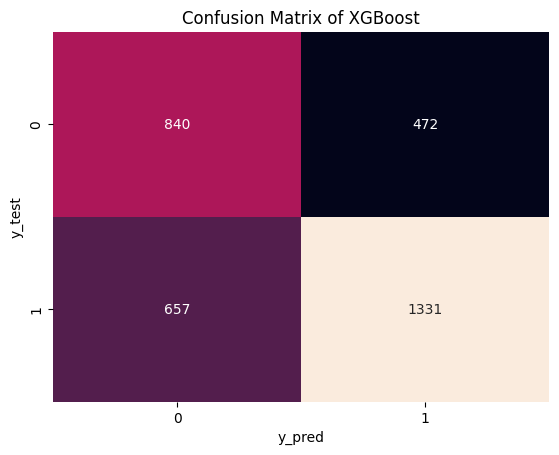

In [30]:
cf_matrix_XGB = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix_XGB, annot=True, cbar = False, fmt = "g")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix of XGBoost")

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60      1312
           1       0.74      0.67      0.70      1988

    accuracy                           0.66      3300
   macro avg       0.65      0.65      0.65      3300
weighted avg       0.67      0.66      0.66      3300

